# Reduced time for multiple rate tests
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a step drawdown test in a fully penetrated confined aquifer (variable rate test).

Copyright 1998-2020 -  Nathan Dutler, Philippe Renard & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data
The data set for this example comes from the following reference: 

Data set : Kruseman and de Ridder (1994), pp. 185, The data are collected in a piezometer located at 5m from the pumping well.

Let us first load the data and plot them.

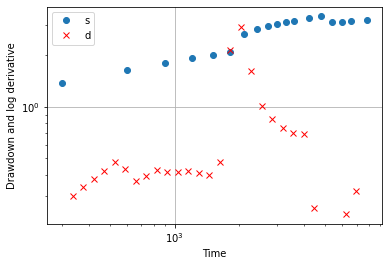

In [2]:
data = pd.read_csv('../data/tmr_ds1.txt', header=None,sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
qm = pd.DataFrame(np.array([[30*60, 500/24/60/60], [80*60, 700/24/60/60], [130*60, 600/24/60/60]]), columns=['t', 'q'])
test = ht.preprocessing(df=data)
test.diagnostic()

## Calculate the Birsoy time and interpret with Theis model

The data are loaded and a deconvolution method will be applied, to obtain equivalent time and drawdown with Birsoy and Summers (1981) technique. Then we can interpret the data with the Theis solution.

In [3]:
test.birsoy_time(df=data, Qmat=qm)

,t,s
0,300.000000,238.464000
1,600.000000,285.120000
2,900.000000,312.768000
3,1200.000000,333.504000
4,1204.377717,330.788571
5,1500.000000,349.056000
6,1615.080231,351.771429
7,1800.000000,361.152000
8,1972.619880,365.348571
9,2309.000938,376.457143


`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 9.0945e+00, final cost 7.2603e+00, first-order optimality 1.62e-09.


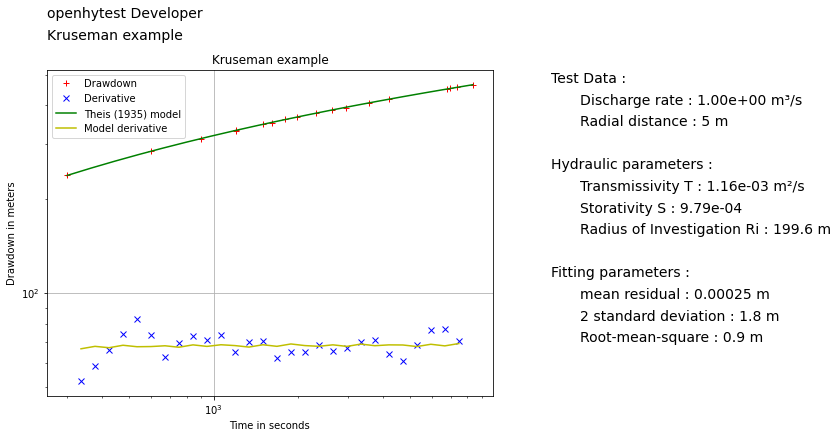

In [4]:
q = 1 #pumping rate in m3/s
d = 5 #radial distance in m
theis_model=ht.Theis(r=d, Q=q, df=test.birsoy)
theis_model.guess_params()
theis_model.rpt(fitmethod='trf', ttle='Kruseman example', author='openhytest Developer', filetype='pdf', reptext='Kruseman example')

The results are in reasonable agreement with the values found by 
Kruseman and de Ridder (1994):

T = 102 m2/d = 1.2 e-3 m2/s and S = 9.6 e-4.

## Synthetic example